In [4]:
# Cell 1: Import necessary libraries
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import cv2


In [5]:
# Cell 2: Constants and ImageDataGenerator setup
TRAIN_DIR = r'D:\SIM\level 3\advanced multimedia\final project\data\train'  # Use the train directory
VAL_DIR = r'D:\SIM\level 3\advanced multimedia\final project\data\val'  # Use the val directory
TEST_DIR = r'D:\SIM\level 3\advanced multimedia\final project\data\test'  # Use the val directory
IMAGE_SIZE = 32  # Reduced image size
BATCH_SIZE = 32  # Reduced batch size

# Using ImageDataGenerator for loading and augmenting the images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    VAL_DIR,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    class_mode='categorical')


Found 28709 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


In [6]:
# Cell 3: Model Definition and Compilation
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 1)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))  # Reduced to 512 neurons
model.add(Dropout(0.5))

model.add(Dense(7, activation='softmax'))  # 7 classes for emotions

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [7]:
# Cell 4: Training with Early Stopping
# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // BATCH_SIZE,
    epochs=10,  # Increase the maximum number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.n // BATCH_SIZE,
    callbacks=[early_stopping])


Epoch 1/10


897/897 [==============================] - 60s 66ms/step - loss: 1.8017 - accuracy: 0.2536 - val_loss: 1.7161 - val_accuracy: 0.3142
Epoch 2/10
897/897 [==============================] - 60s 67ms/step - loss: 1.7039 - accuracy: 0.3108 - val_loss: 1.5607 - val_accuracy: 0.3954
Epoch 3/10
897/897 [==============================] - 60s 66ms/step - loss: 1.6146 - accuracy: 0.3621 - val_loss: 1.4891 - val_accuracy: 0.4255
Epoch 4/10
897/897 [==============================] - 59s 66ms/step - loss: 1.5575 - accuracy: 0.3933 - val_loss: 1.4032 - val_accuracy: 0.4643
Epoch 5/10
897/897 [==============================] - 60s 67ms/step - loss: 1.5040 - accuracy: 0.4160 - val_loss: 1.3843 - val_accuracy: 0.4632
Epoch 6/10
897/897 [==============================] - 61s 68ms/step - loss: 1.4702 - accuracy: 0.4333 - val_loss: 1.3327 - val_accuracy: 0.4919
Epoch 7/10
897/897 [==============================] - 60s 67ms/step - loss: 1.4423 - accuracy: 0.4459 - val_loss: 1.3274 - val_accurac

In [8]:
# save the model
model.save("./model_file.h5")

C:\Users\YOUSSEF\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [9]:
#load the saved model
from keras.models import load_model

# Load the modela
loaded_model = load_model("./model_file.h5")


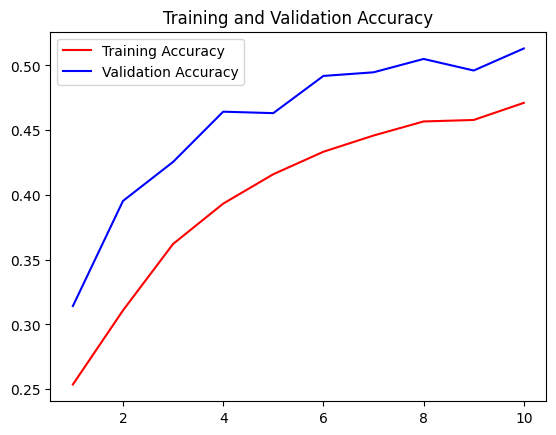

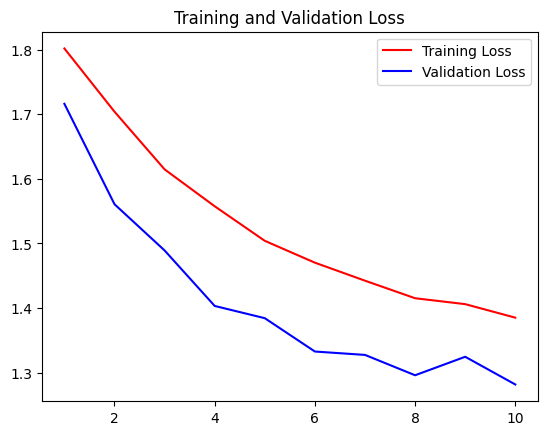

In [10]:


# Plot training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


In [11]:
# Evaluate the model on validation data
val_loss, val_acc = model.evaluate(validation_generator)
print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}')

113/113 [==============================] - 2s 18ms/step - loss: 1.2816 - accuracy: 0.5132
Validation Loss: 1.2816, Validation Accuracy: 0.5132


In [14]:
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
import numpy as np

# Path to the new image you want to predict
new_image_path = r"D:\SIM\level 3\advanced multimedia\final project\data\train\6\112.png"

# Load and preprocess the image
img = image.load_img(new_image_path, target_size=(IMAGE_SIZE, IMAGE_SIZE), grayscale=True)
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize pixel values

# Use the loaded model for prediction
predictions = model.predict(img_array)

# Assuming your model has 7 output classes for emotions
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Get the predicted emotion label
predicted_emotion_index = np.argmax(predictions)
predicted_emotion_label = emotion_labels[predicted_emotion_index]

print(f"Predicted Emotion: {predicted_emotion_label}")


1/1 [==============================] - 0s 22ms/step
Predicted Emotion: Neutral
